In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/therochvoices/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
df = pd.read_csv('winequality-white.csv', delimiter=';')
df.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2020,7.7,0.26,0.34,6.4,0.05,36.0,163.0,0.9937,3.19,0.7,11.5,6


In [4]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

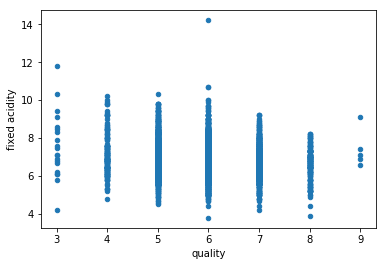

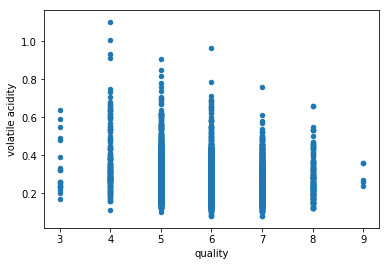

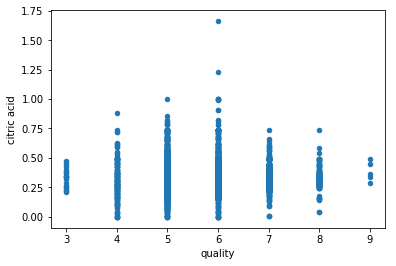

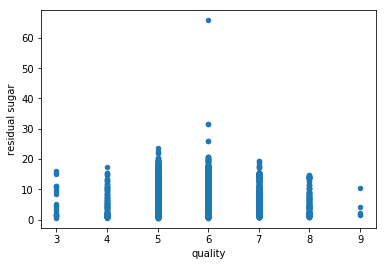

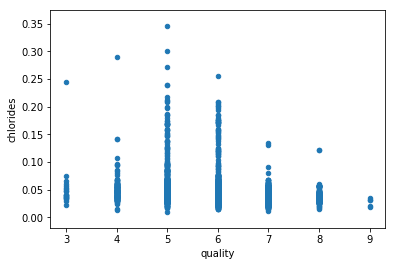

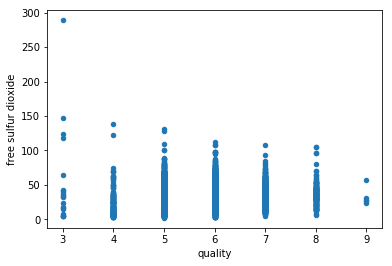

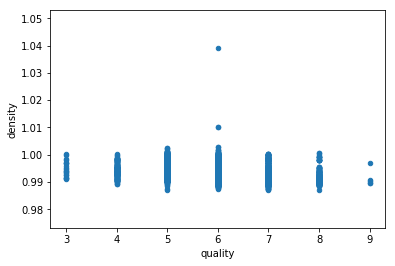

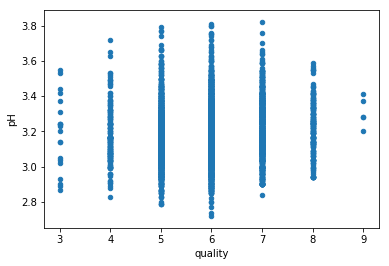

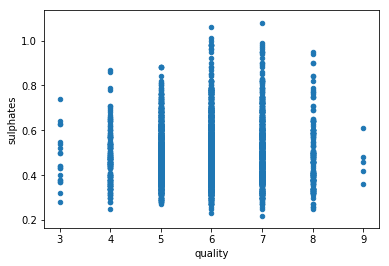

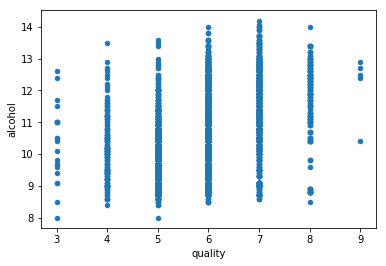

In [9]:
df.plot(kind='scatter',x = 'quality', y = 'fixed acidity')
df.plot(kind='scatter',x = 'quality', y = 'volatile acidity')
df.plot(kind='scatter',x = 'quality', y = 'citric acid')
df.plot(kind='scatter',x = 'quality', y = 'residual sugar')
df.plot(kind='scatter',x = 'quality', y = 'chlorides')
df.plot(kind='scatter',x = 'quality', y = 'free sulfur dioxide')
df.plot(kind='scatter',x = 'quality', y = 'density')
df.plot(kind='scatter',x = 'quality', y = 'pH')
df.plot(kind='scatter',x = 'quality', y = 'sulphates')
df.plot(kind='scatter',x = 'quality', y = 'alcohol')

In [10]:
x = df.iloc[:, 0:11].values
y = df.iloc[:, 11].values

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=23)

In [12]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
xg = XGBClassifier(n_jobs=-1)
lr = LogisticRegression(n_jobs=-1)
rfg = RandomForestClassifier(n_estimators=100, n_jobs=-1)
xg.fit(x_train, y_train)
lr.fit(x_train, y_train)
rfg.fit(x_train, y_train)

/home/therochvoices/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
y_xg = xg.predict(x_test)
y_lr = lr.predict(x_test)
y_rfg = rfg.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix
mat1 = confusion_matrix(y_test, y_xg)
mat2 = confusion_matrix(y_test, y_lr)
mat3 = confusion_matrix(y_test, y_rfg)

In [20]:
print(mat1)
print(mat2)
print(mat3)

[[  0   0   2   1   0   0   0]
 [  0   3  18  10   0   0   0]
 [  0   1 183 112   2   0   0]
 [  0   2  78 325  19   0   0]
 [  0   1   5 128  54   0   0]
 [  0   0   0  25   9   1   0]
 [  0   0   0   0   1   0   0]]
[[  0   0   1   2   0   0   0]
 [  0   0  18  12   1   0   0]
 [  0   0 153 144   1   0   0]
 [  0   0  79 340   5   0   0]
 [  0   0   8 172   8   0   0]
 [  0   0   1  29   5   0   0]
 [  0   0   0   1   0   0   0]]
[[  0   0   1   2   0   0   0]
 [  0   8  14   9   0   0   0]
 [  0   2 205  90   1   0   0]
 [  0   1  61 334  28   0   0]
 [  0   0   3  86  98   1   0]
 [  0   0   0  15   7  13   0]
 [  0   0   0   0   1   0   0]]
